In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline

In [3]:
#load the dataset and cover it into dataframe--->
data=pd.read_csv(r"D:\AIML\dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv",on_bad_lines='skip')
data=data.drop(columns="Over18")
data=pd.DataFrame(data)

In [4]:
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes       ravel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [5]:
#let separate the data for x and y---->
x=data.drop(columns='Attrition')
y=data['Attrition'].map({"Yes":1,"No":0})

In [6]:
#let check the x and y shape and it's data--->
print(x.shape) #----
print(y.shape)
print(y.head())


(1470, 33)
(1470,)
0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64


In [7]:
# let divie the different data -->
numeric=[
  "Age",
  "DailyRate",
  "DistanceFromHome",
  "Education",
  "EmployeeCount",
  "EmployeeNumber",
  "EnvironmentSatisfaction",
  "HourlyRate",
  "JobInvolvement",
  "JobLevel",
  "MonthlyIncome",
  "MonthlyRate",
  "NumCompaniesWorked",
  "PercentSalaryHike",
  "PerformanceRating",
  "RelationshipSatisfaction",
  "StandardHours",
  "StockOptionLevel",
  "TotalWorkingYears",
  "TrainingTimesLastYear",
  "WorkLifeBalance",
  "YearsAtCompany",
  "YearsInCurrentRole",
  "YearsSinceLastPromotion",
  "YearsWithCurrManager"

]
catagori=[
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "JobSatisfaction",
    "MaritalStatus",
    "OverTime"
]

In [8]:
#preprocessor = ColumnTransformer(
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric),
        ("cat", OneHotEncoder(handle_unknown="ignore"),catagori)
    ]
)

In [9]:
#let create pipe line-->
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier",RandomForestClassifier(
    n_estimators=200,        # 1️⃣ number of trees
    max_depth=20,            # 2️⃣ maximum depth of tree
    min_samples_split=5,     # 3️⃣ min samples to split node
    min_samples_leaf=2,      # 4️⃣ min samples in leaf
    max_features="sqrt",     # 5️⃣ features per split
    bootstrap=True,          # 6️⃣ bootstrap sampling
    criterion="gini",        # 7️⃣ split quality
    class_weight="balanced", # 8️⃣ handle imbalance
    random_state=42          # 9️⃣ reproducibility
))
    ]
)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

In [11]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [12]:
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)

In [13]:
print("Accuracy on test data:", round(accuracy_score(y_test, y_pred),2)*100)
print("Accuracy on train data:",round(accuracy_score(y_train,x_pred),2)*100)

Accuracy on test data: 87.0
Accuracy on train data: 100.0


In [14]:
i=0 # here you can change the value of teh i ---->
if y_pred[i]==1:
    print("this person is  not going to leave his job")
else:
    print("this person will leave this company")

this person will leave this company


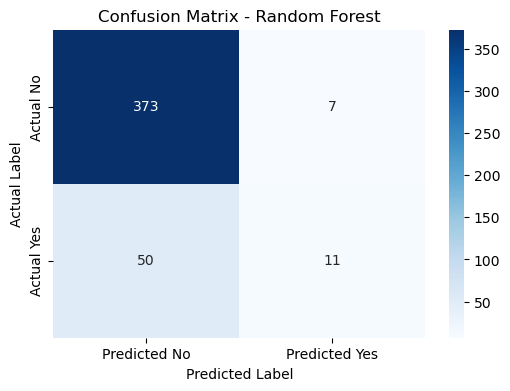

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted No", "Predicted Yes"],
    yticklabels=["Actual No", "Actual Yes"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()
